In [16]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

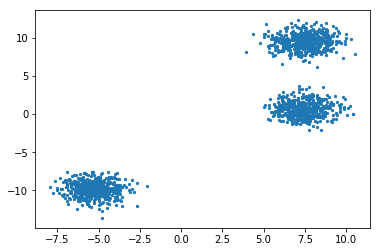

In [18]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [29]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['GaussianMixture'], 
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, shared_model=True,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * calinski_harabasz_score(X, y_pred)  
                                      )

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 20], Default: 5
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    init_params___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    n_components___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    warm_start___GaussianMixture | algorithm_choice in {'GaussianMixture'}



Optimization is complete.
Took 5.536802530288696 seconds, the optimal configuration is 
Configuration:
  algorithm_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'tied'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 3
  warm_start___GaussianMixture, Value: True



In [30]:
opt_result

Configuration:
  algorithm_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'tied'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 3
  warm_start___GaussianMixture, Value: True

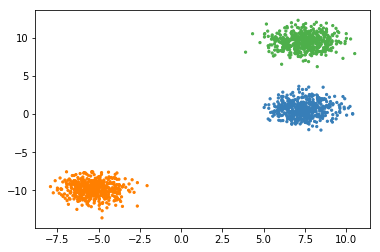

array([2, 2, 2, ..., 2, 1, 1])

In [31]:
autocluster.predict(X)

In [32]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00016880035400390625),
 TrajEntry(train_perf=-23124.912603493416, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=0.10337424278259277, wallclock_time=0.12160277366638184),
 TrajEntry(train_perf=-34626.60397298819, incumbent_id=2, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'tied'
   init_params___GaussianMixt

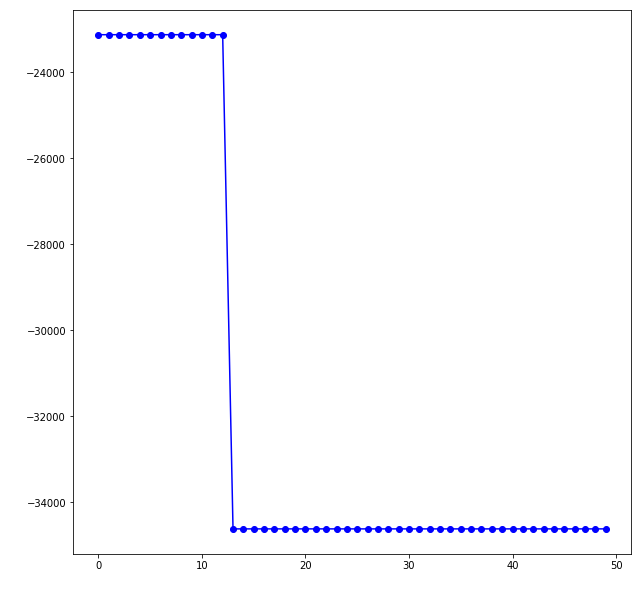

In [33]:
autocluster.plot_convergence()